<a href="https://colab.research.google.com/github/YutthapoomTh/ColorDetect/blob/main/Train_model/YOLOv8%20/Train_YOLO_GunDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#ffca1d'> 🟠 YOLOv8 Gun Detection Train Model</font>

In [ ]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

## 🔍 Check Runtime
Check the current runtime environment before training the YOLOv8 model.

### 🖥️ Check Operating System

In [ ]:
!cat /etc/*release

### ⚙️ Check CPU Info
Shows CPU details including model, core count, and frequency.

In [ ]:
!cat /proc/cpuinfo

### Check Python Version
Verifies the Python version being used in the current environment.

In [ ]:
!python --version

### Check GPU Availability
Checks whether a GPU is connected and accessible. If so, it prints GPU

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

### Check RAM Size
Detects the total available RAM. If the environment has 20 GB or more, it indicates a high-RAM runtime — useful for training large models or using larger batch sizes.

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

# 📥 Download Dataset From Drive
- This section shows how to automatically download and organize the dataset from Google Drive using `gdown`.

## 🔧 Step 1: Reinstall gdown

In [ ]:
%pip uninstall -y gdown
%pip install --upgrade --no-cache-dir gdown

Found existing installation: gdown 5.2.0
Uninstalling gdown-5.2.0:
  Successfully uninstalled gdown-5.2.0


## 📁 Step 2: Prepare Dataset Directory

In [ ]:
%cd /content

from pathlib import Path

dataset_dir = Path('./dataset')
dataset_dir.mkdir(exist_ok=True)

/content


## Move Cookies for Authenticated Download (if can't Download)
We use Chrome Extension 🏠🍪 Get cookies.txt LOCALLY

To download private or access-restricted files from Google Drive using `gdown`, follow these steps:

1. **Install Chrome Extension**:  
   Use the browser extension shown below to generate a `cookies.txt` file.

2. **Click the extension icon** to download `cookies.txt`.

3. **Upload `cookies.txt` to Google Colab** using the file upload tool.

4. **Move cookies file to gdown cache**:
   `!sudo mv cookies.txt ~/.cache/gdown/cookies.txt`

In [ ]:
!sudo mv cookies.txt ~/.cache/gdown/cookies.txt

## 🌐 Step 3: Download and Extract the Dataset
- Download the dataset ZIP file from Google Drive and extract it into the dataset directory.

In [ ]:
import gdown

url = "https://drive.google.com/file/d/1X61CO03RXrvzx4Z7CO1X8Ox7BHptp0en/view?usp=drive_link"
output_path = 'images_dataset.zip'
gdown.download(url, output_path, quiet=False,fuzzy=True)

# Unzip File
!unzip "/content/images_dataset.zip" -d "/content/dataset/"
#!sudo rm /content/images.zip
print("\n__________ Completed __________")

Downloading...
From (original): https://drive.google.com/uc?id=1X61CO03RXrvzx4Z7CO1X8Ox7BHptp0en
From (redirected): https://drive.google.com/uc?id=1X61CO03RXrvzx4Z7CO1X8Ox7BHptp0en&confirm=t&uuid=736cbf99-ed62-4a51-a35b-54b8996f96b3&at=ABZjQiYTDtEQ4BFD0ZTJz4s34lCy%3A1745131234192
To: /content/images_dataset.zip
100%|██████████| 17.7G/17.7G [07:08<00:00, 41.2MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/images/train/internet_rifle_226.xml  
  inflating: /content/dataset/images/train/internet_rifle_228.jpg  
  inflating: /content/dataset/images/train/internet_rifle_228.xml  
  inflating: /content/dataset/images/train/internet_rifle_229.jpg  
  inflating: /content/dataset/images/train/internet_rifle_229.xml  
  inflating: /content/dataset/images/train/internet_rifle_230.jpg  
  inflating: /content/dataset/images/train/internet_rifle_230.xml  
  inflating: /content/dataset/images/train/internet_rifle_231.jpg  
  inflating: /content/dataset/images/train/internet_rifle_231.xml  
  inflating: /content/dataset/images/train/internet_rifle_232.jpg  
  inflating: /content/dataset/images/train/internet_rifle_232.xml  
  inflating: /content/dataset/images/train/internet_rifle_233.jpg  
  inflating: /content/dataset/images/train/internet_rifle_233.xml  
  inflating: /content/dataset/images/train/internet_rifle_234.jpg

## 🧹 Step 5: Clean and Organize the Dataset
- Remove unnecessary .csv and .xml annotation files and move the test/ folder as val/ for YOLO-compatible training-validation split.

In [ ]:
!sudo rm /content/dataset/images/test_labels.csv
!sudo rm /content/dataset/images/train_labels.csv

!sudo rm /content/dataset/images/train/*.xml
!sudo rm /content/dataset/images/test/*.xml

!sudo mv /content/dataset/images/test /content/dataset/images/val

"\n__________ Completed __________"

'\n__________ Completed __________'

## 🔢 Check Number of Files
Verify that your training and validation folders have the expected files:

### ✅ Check Training Files

In [ ]:
import os

source_dir="/content/dataset/images/train/"

for i, filename in enumerate(os.listdir(source_dir)):
    print(f"no.{i+1} {filename}")

print("\n__________ Completed __________")

no.1 camera_shotgun_1346-flip.jpg
no.2 camera_shotgun_656_Rotated315.jpg
no.3 camera_shotgun_784-flip_Rotated45.jpg
no.4 ai_gen_handgun_73-flip_Rotated45.jpg
no.5 camera_rifle_812-flip_Rotated315.jpg
no.6 camera_handgun_170-flip-flip.jpg
no.7 camera_handgun_927-flip_Rotated315.jpg
no.8 camera_handgun_242-flip.jpg
no.9 camera_shotgun_1119-flip_Rotated45.jpg
no.10 camera_shotgun_612_Rotated315.jpg
no.11 ai_gen_shotgun_9_Rotated45.jpg
no.12 camera_handgun_307.jpg
no.13 camera_handgun_775_Rotated45.jpg
no.14 camera_shotgun_1463-flip_Rotated315.jpg
no.15 ai_gen_rifle_86_Rotated45.jpg
no.16 camera_shotgun_627-flip_Rotated315.jpg
no.17 ai_gen_rifle_88_Rotated45.jpg
no.18 camera_shotgun_1440_Rotated315.jpg
no.19 internet_handgun_1185.jpg
no.20 camera_shotgun_101_Rotated45.jpg
no.21 camera_rifle_767.jpg
no.22 camera_shotgun_720_Rotated45.jpg
no.23 ai_gen_shotgun_295-flip_Rotated45.jpg
no.24 camera_handgun_812-flip_Rotated315.jpg
no.25 camera_shotgun_662-flip.jpg
no.26 internet_handgun_525.jpg
n

### ✅ Check Validation Files

In [ ]:
import os

source_dir="/content/dataset/images/val/"

for i, filename in enumerate(os.listdir(source_dir)):
    print(f"no.{i+1} {filename}")

print("\n__________ Completed __________")

no.1 camera_handgun_890-flip_Rotated315.jpg
no.2 camera_rifle_134-flip.jpg
no.3 camera_handgun_824-flip.jpg
no.4 cctv_video_internet__475.jpg
no.5 ai_gen_handgun_244.jpg
no.6 camera_shotgun_244-flip_Rotated45.jpg
no.7 ai_gen_rifle_209_Rotated45.jpg
no.8 camera_shotgun_189_Rotated315.jpg
no.9 camera_rifle_718.jpg
no.10 ai_gen_shotgun_226-flip.jpg
no.11 ai_gen_handgun_255.jpg
no.12 internet_handgun_1689.jpg
no.13 ai_gen_handgun_285.jpg
no.14 internet_rifle_815.jpg
no.15 internet_handgun_1787.jpg
no.16 ai_gen_rifle_40.jpg
no.17 internet_handgun_1271.jpg
no.18 camera_rifle_414-flip_Rotated45.jpg
no.19 camera_shotgun_214-flip_Rotated45.jpg
no.20 ai_gen_shotgun_7_Rotated45.jpg
no.21 ai_gen_rifle_57_Rotated45.jpg
no.22 camera_shotgun_1110-flip_Rotated45.jpg
no.23 internet_shotgun_1476.jpg
no.24 ai_gen_rifle_115_Rotated315.jpg
no.25 camera_handgun_504-flip_Rotated45.jpg
no.26 camera_rifle_847-flip_Rotated315.jpg
no.27 ai_gen_shotgun_148_Rotated315.jpg
no.28 internet_shotgun_1828.jpg
no.29 ai_g

## 🏷️ Download Labels Dataset
Download label files (YOLO .txt format) from Google Drive and extract them.

In [ ]:
import gdown

url = "https://drive.google.com/file/d/1gCnTuFL2AJSXjE78PtOcFa6l1a8X-D5v/view?usp=drive_link"
output_path = 'labels_dataset.zip'

gdown.download(url, output_path, quiet=False,fuzzy=True)

!unzip "/content/labels_dataset.zip" -d "/content/dataset/"
#!sudo rm /content/labels.zip
print("\n__________ Completed __________")

Downloading...
From (original): https://drive.google.com/uc?id=1gCnTuFL2AJSXjE78PtOcFa6l1a8X-D5v
From (redirected): https://drive.google.com/uc?id=1gCnTuFL2AJSXjE78PtOcFa6l1a8X-D5v&confirm=t&uuid=3e574f0a-aa56-4505-aaae-203a4671595f
To: /content/labels_dataset.zip
100%|██████████| 6.23M/6.23M [00:00<00:00, 173MB/s]


Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset/labels/train/internet_rifle_371.txt  
  inflating: /content/dataset/labels/train/internet_rifle_372.txt  
 extracting: /content/dataset/labels/train/internet_rifle_373.txt  
  inflating: /content/dataset/labels/train/internet_rifle_374.txt  
  inflating: /content/dataset/labels/train/internet_rifle_375.txt  
  inflating: /content/dataset/labels/train/internet_rifle_376.txt  
  inflating: /content/dataset/labels/train/internet_rifle_377.txt  
 extracting: /content/dataset/labels/train/internet_rifle_378.txt  
 extracting: /content/dataset/labels/train/internet_rifle_379.txt  
 extracting: /content/dataset/labels/train/internet_rifle_38.txt  
  inflating: /content/dataset/labels/train/internet_rifle_380.txt  
 extracting: /content/dataset/labels/train/internet_rifle_381.txt  
 extracting: /content/dataset/labels/train/internet_rifle_382.txt  
  inflating: /content/dataset/labels/train/internet_rifle_383.txt 

# 📝 Make `gun_dataset.yaml` File
- Create a dataset configuration file for training the YOLOv8 model with custom gun classes.
- 📂 This file tells YOLOv8 where the training and validation images are, how many classes (nc), and what the class names are.



In [ ]:
f1 = open('/content/dataset/gun_dataset.yaml','w',encoding='UTF-8')

f1.write('train: /content/dataset/images/train\n')
f1.write('val: /content/dataset/images/val\n')
f1.write('\n')
f1.write('nc: 3\n')
f1.write("names: ['Handgun','Rifle','Shotgun']")

f1.close()

## 📄 View the YAML File
Displays the content of the created .yaml file to ensure it was written correctly.

In [ ]:
!cat /content/dataset/gun_dataset.yaml

train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 3
names: ['Handgun','Rifle','Shotgun']

# ⚙️ Install Requirements

Install all required libraries for running YOLOv8 and PyTorch:

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 114.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [ ]:
%pip install torch torchvision torchaudio

## ✅ Verify Install
Ensure that the YOLOv8 and PyTorch installations are successful.


### 🔍 Verify YOLO Installation

In [ ]:
# Verify YOLO
import ultralytics
ultralytics.checks()

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 75.9/235.7 GB disk)


### 🔍 Verify Torch Installation

In [ ]:
# Verify Torch
import torch

print("\ntorch version = ", torch.__version__)
print("CUDA Available = ", torch.cuda.is_available())
print("CUDA Device = ", torch.cuda.get_device_name())


torch version =  2.6.0+cu124
CUDA Available =  True
CUDA Device =  Tesla T4


### 🔍 Verify Torchvision Version

In [ ]:
import torchvision
print("torchvision =", torchvision.__version__)

torchvision = 0.21.0+cu124


## 🧪 Test Model – YOLOv8 Pretrained
Run a quick test using a pretrained YOLOv8 model and a sample image.

Downloading...
From: https://drive.google.com/uc?id=1EYpP0-oA5lr-BEvoeZMRbiTHcbK5OtPA
To: /content/city_scene_image.png
100%|██████████| 705k/705k [00:00<00:00, 154MB/s]


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.6MB/s]



image 1/1 /content/city_scene_image.png: 384x640 28 persons, 2 buss, 2 umbrellas, 2 potted plants, 46.3ms
Speed: 12.4ms preprocess, 46.3ms inference, 352.0ms postprocess per image at shape (1, 3, 384, 640)


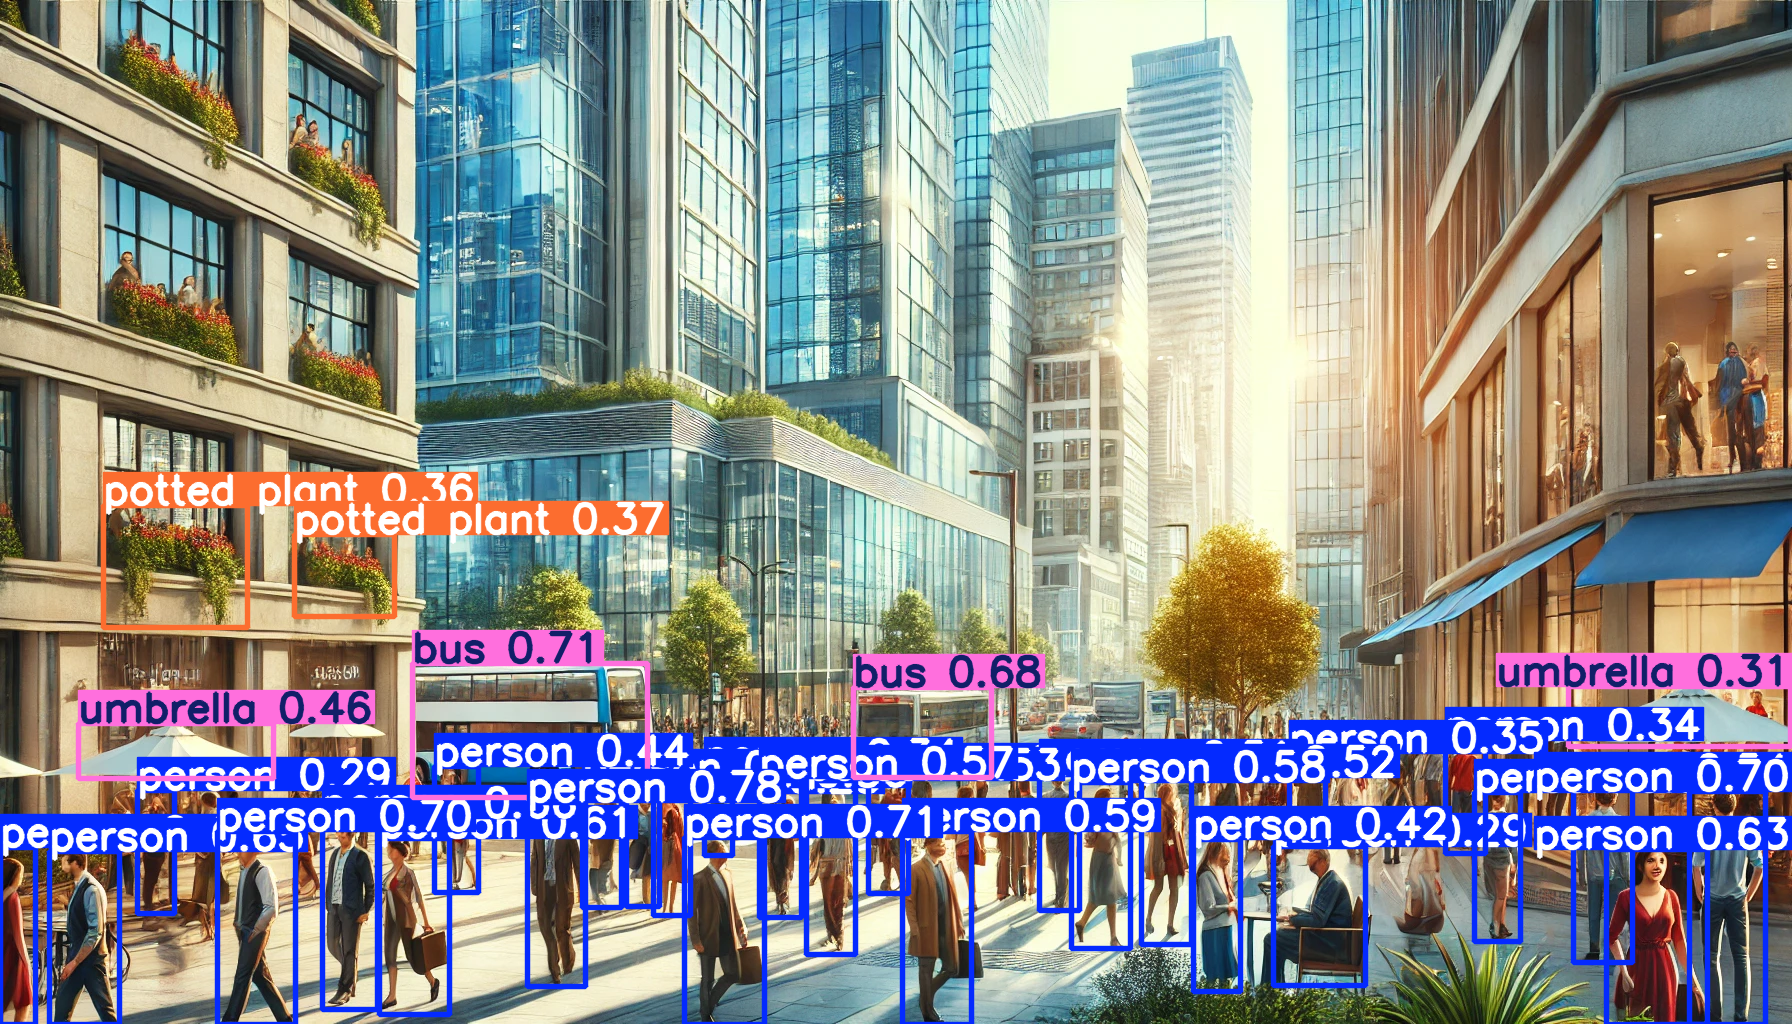

In [ ]:
import gdown
from ultralytics import YOLO

# 🔽 Download a sample image
url = "https://drive.google.com/file/d/1EYpP0-oA5lr-BEvoeZMRbiTHcbK5OtPA/view?usp=drive_link"
output_path = 'city_scene_image.png'
gdown.download(url, output_path, quiet=False, fuzzy=True)

# 📦 Load the pretrained yolov8n model or yolo11n, yolo12n
model = YOLO("yolov8n.pt")

# 🧠 Perform object detection on the image
results = model("/content/city_scene_image.png")

# 🖼️ Display the result
results[0].show()

# Train Model - YOLOv8 Gun Detection
- Train a YOLOv8 model using a custom dataset to detect different types of guns (e.g., handgun, rifle, shotgun).

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/gun_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=/content/drive/MyDrive/GunDetection_project/YOLOv8, name=00-Train_model_gun_detection_yolov8_default, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2715.2±1674.8 MB/s, size: 1271.6 KB)


train: Scanning /content/dataset/labels/train... 23840 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23840/23840 [01:07<00:00, 355.55it/s] 


train: New cache created: /content/dataset/labels/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (18.5GB RAM): 100%|██████████| 23840/23840 [01:30<00:00, 263.17it/s] 


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 51.0±36.6 MB/s, size: 438.0 KB)


val: Scanning /content/dataset/labels/val... 2649 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2649/2649 [00:07<00:00, 337.23it/s]

val: New cache created: /content/dataset/labels/val.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.0GB RAM): 100%|██████████| 2649/2649 [00:10<00:00, 256.11it/s]


Plotting labels to /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.07G     0.8223      1.612        1.2         38        640: 100%|██████████| 1490/1490 [03:44<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:14<00:00,  5.72it/s]


                   all       2649       2797      0.514      0.418      0.412       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.75G     0.7019      0.842      1.098         26        640: 100%|██████████| 1490/1490 [03:36<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.78it/s]


                   all       2649       2797      0.482      0.413      0.393      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.75G     0.7321     0.7191      1.112         41        640: 100%|██████████| 1490/1490 [03:34<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.80it/s]


                   all       2649       2797      0.441      0.238      0.239      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.76G     0.7207     0.6621      1.106         35        640: 100%|██████████| 1490/1490 [03:33<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.81it/s]


                   all       2649       2797      0.494      0.433      0.454      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.77G     0.6526     0.5709       1.07         43        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.80it/s]

                   all       2649       2797      0.561       0.47      0.494      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.78G     0.6199     0.5322       1.05         41        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.86it/s]


                   all       2649       2797      0.639      0.481      0.544      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.79G     0.5883     0.5002      1.035         41        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.88it/s]

                   all       2649       2797      0.671      0.552      0.616      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.8G     0.5638     0.4744      1.021         41        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.94it/s]


                   all       2649       2797      0.661      0.582      0.645      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.81G     0.5455     0.4526       1.01         30        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.81it/s]

                   all       2649       2797      0.681      0.584       0.66      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.82G     0.5265      0.438      1.002         34        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.78it/s]

                   all       2649       2797      0.687      0.614      0.685      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.83G     0.5222     0.4321     0.9979         44        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.96it/s]

                   all       2649       2797      0.727      0.621      0.704      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.84G      0.507     0.4201     0.9904         42        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.84it/s]

                   all       2649       2797      0.746      0.652      0.742      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.86G     0.4961     0.4067     0.9836         38        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.85it/s]

                   all       2649       2797      0.764       0.67      0.758      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.87G      0.487     0.4002     0.9813         31        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.94it/s]

                   all       2649       2797      0.785      0.655      0.764      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.88G     0.4768     0.3928     0.9765         45        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.85it/s]

                   all       2649       2797      0.784      0.706      0.799      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.89G     0.4713     0.3878     0.9742         40        640: 100%|██████████| 1490/1490 [03:33<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.86it/s]

                   all       2649       2797      0.787      0.701      0.794      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.9G     0.4702     0.3829     0.9741         34        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.99it/s]

                   all       2649       2797        0.8      0.724      0.805      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.91G     0.4604     0.3747     0.9668         26        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.94it/s]

                   all       2649       2797      0.815      0.722      0.816      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.92G     0.4565     0.3723     0.9679         47        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.78it/s]

                   all       2649       2797      0.817      0.729      0.824      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.93G     0.4462     0.3664     0.9628         33        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.98it/s]

                   all       2649       2797      0.808      0.746      0.829       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.95G      0.446     0.3641     0.9633         35        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.86it/s]

                   all       2649       2797      0.832      0.731      0.833      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.96G     0.4407     0.3576     0.9594         35        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.87it/s]

                   all       2649       2797      0.815      0.747       0.84      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.97G     0.4371      0.357     0.9574         45        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.99it/s]

                   all       2649       2797      0.828      0.756       0.85      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.98G     0.4308     0.3494     0.9539         42        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.96it/s]

                   all       2649       2797      0.833      0.769      0.855      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.99G      0.429     0.3501     0.9554         33        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.829      0.761      0.848      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         3G     0.4263     0.3483     0.9539         29        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.03it/s]

                   all       2649       2797      0.851      0.773      0.861      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.01G     0.4208     0.3414      0.951         39        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.99it/s]

                   all       2649       2797      0.833      0.776      0.859      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.03G     0.4165     0.3382     0.9486         36        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.92it/s]

                   all       2649       2797      0.848      0.786      0.872      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.04G     0.4165     0.3402     0.9521         44        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.99it/s]

                   all       2649       2797      0.853      0.792      0.876      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.05G     0.4124     0.3357     0.9467         44        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.91it/s]

                   all       2649       2797      0.863      0.782      0.876      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.06G     0.4091      0.331     0.9458         46        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.82it/s]

                   all       2649       2797      0.876      0.794      0.881      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.07G     0.4034     0.3299      0.944         39        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.877      0.798      0.884      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.08G     0.4033     0.3298     0.9453         47        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.92it/s]

                   all       2649       2797      0.878      0.794      0.884       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.09G     0.3998     0.3265     0.9413         38        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.97it/s]

                   all       2649       2797      0.881      0.803      0.889      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.11G      0.395     0.3228     0.9416         30        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.84it/s]

                   all       2649       2797      0.875      0.811      0.891      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.12G      0.394     0.3212     0.9397         39        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.873      0.809      0.894      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.13G     0.3891     0.3169     0.9363         39        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.92it/s]

                   all       2649       2797      0.872      0.812      0.896      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.14G     0.3901     0.3177     0.9381         32        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.88it/s]

                   all       2649       2797      0.877      0.817      0.897      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.15G     0.3878     0.3165     0.9357         40        640: 100%|██████████| 1490/1490 [03:33<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.878      0.818      0.899      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.16G     0.3833     0.3117     0.9348         37        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.92it/s]

                   all       2649       2797      0.872      0.819      0.901      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.17G      0.382     0.3092     0.9341         32        640: 100%|██████████| 1490/1490 [03:33<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.92it/s]

                   all       2649       2797       0.88      0.819      0.901      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.19G     0.3795     0.3094     0.9313         41        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.887       0.82      0.903      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.2G     0.3782     0.3057     0.9321         45        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.888      0.819      0.903      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.21G     0.3767     0.3054     0.9326         41        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797       0.89      0.817      0.904      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.22G     0.3733     0.3028     0.9301         33        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.893      0.821      0.905      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.23G     0.3732     0.3024     0.9312         45        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797      0.889      0.826      0.905      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.24G     0.3701     0.2994     0.9295         36        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.886      0.829      0.906      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.25G     0.3701     0.2989     0.9292         37        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.887      0.828      0.907      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.26G     0.3669     0.2962     0.9296         31        640: 100%|██████████| 1490/1490 [03:33<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.891      0.828      0.909      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.28G      0.362     0.2941     0.9266         35        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.91it/s]

                   all       2649       2797       0.89      0.832      0.909      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.29G     0.3628     0.2912     0.9266         36        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.01it/s]

                   all       2649       2797       0.89      0.834      0.911      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.3G     0.3608     0.2925     0.9263         38        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.91it/s]

                   all       2649       2797      0.888      0.834      0.911      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.31G     0.3584     0.2892      0.925         40        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.90it/s]

                   all       2649       2797      0.889      0.834      0.911      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.32G     0.3558     0.2866     0.9232         40        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.96it/s]

                   all       2649       2797      0.889      0.836      0.912      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.33G     0.3534      0.286     0.9217         33        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.90it/s]

                   all       2649       2797       0.89      0.836      0.913      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.34G     0.3528     0.2839     0.9235         35        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.90it/s]

                   all       2649       2797      0.889      0.836      0.912      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.36G     0.3484     0.2796     0.9226         38        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.91it/s]

                   all       2649       2797      0.892      0.834      0.912      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.37G      0.347     0.2801     0.9201         49        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.82it/s]

                   all       2649       2797      0.893      0.836      0.913      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.38G      0.348     0.2807     0.9215         38        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.97it/s]

                   all       2649       2797      0.886      0.843      0.914      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.39G     0.3438     0.2786     0.9199         46        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.93it/s]

                   all       2649       2797       0.89      0.841      0.914       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       3.4G     0.3462     0.2786     0.9186         48        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.88it/s]

                   all       2649       2797      0.892      0.841      0.914      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.41G     0.3401     0.2725     0.9174         36        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.893      0.841      0.914      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.42G     0.3394     0.2717     0.9163         32        640: 100%|██████████| 1490/1490 [03:33<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.88it/s]

                   all       2649       2797      0.891      0.842      0.914      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.44G     0.3374     0.2717     0.9152         38        640: 100%|██████████| 1490/1490 [03:33<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.94it/s]

                   all       2649       2797      0.895      0.842      0.914      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.45G     0.3364     0.2696     0.9154         45        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.894      0.844      0.915      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.46G     0.3324     0.2669     0.9143         41        640: 100%|██████████| 1490/1490 [03:33<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.94it/s]

                   all       2649       2797      0.893      0.846      0.916      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.47G     0.3319     0.2652     0.9137         33        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.98it/s]

                   all       2649       2797      0.896      0.842      0.916      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.48G     0.3287     0.2639     0.9128         51        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.895      0.842      0.917      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.49G     0.3263      0.262     0.9126         43        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.895      0.845      0.917      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.5G     0.3225     0.2602     0.9117         30        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797      0.898      0.842      0.918      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.52G     0.3215      0.258     0.9108         37        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797        0.9      0.844      0.918      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.53G     0.3222     0.2578     0.9103         36        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.04it/s]

                   all       2649       2797      0.902      0.843      0.919       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.54G     0.3191     0.2556     0.9102         33        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.95it/s]

                   all       2649       2797      0.904      0.843       0.92       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.55G     0.3185     0.2536     0.9089         45        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.97it/s]

                   all       2649       2797      0.904      0.843      0.921      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.56G     0.3166     0.2525     0.9085         37        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.97it/s]

                   all       2649       2797      0.906      0.843      0.921      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.57G     0.3125     0.2504     0.9067         40        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.93it/s]

                   all       2649       2797      0.907      0.844      0.922      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.58G      0.313     0.2492     0.9075         40        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.90it/s]

                   all       2649       2797      0.908      0.847      0.923      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       3.6G     0.3086      0.244      0.906         33        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.82it/s]

                   all       2649       2797      0.909      0.849      0.924      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.61G     0.3088     0.2441     0.9057         35        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.93it/s]

                   all       2649       2797      0.909      0.849      0.924      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.62G     0.3068     0.2447     0.9042         37        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.93it/s]

                   all       2649       2797      0.909      0.851      0.925      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.63G     0.3038     0.2424     0.9018         42        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.97it/s]

                   all       2649       2797      0.912      0.851      0.926      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.64G     0.3016     0.2383     0.9039         39        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797      0.911      0.852      0.927      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.65G     0.2994     0.2363     0.9015         44        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797      0.907      0.855      0.927      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.66G     0.2962      0.236        0.9         35        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797      0.908      0.855      0.927      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.68G      0.294     0.2321     0.9003         39        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.98it/s]

                   all       2649       2797      0.911      0.856      0.928      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.69G     0.2935     0.2333     0.9008         34        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797       0.91      0.859      0.928      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       3.7G     0.2906     0.2317     0.8973         46        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.97it/s]

                   all       2649       2797      0.914      0.858      0.929      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.71G     0.2876     0.2283     0.8981         39        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.91it/s]

                   all       2649       2797      0.916      0.856      0.929      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.72G     0.2869     0.2276     0.8976         34        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.00it/s]

                   all       2649       2797      0.918      0.857      0.931      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.73G     0.2863     0.2253     0.8976         47        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  7.01it/s]

                   all       2649       2797      0.918      0.857      0.931      0.644


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.74G       1.01     0.6116     0.9998         17        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.915      0.864      0.932      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.75G     0.9834     0.5748     0.9894         16        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.63it/s]

                   all       2649       2797      0.915      0.865      0.933      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.76G     0.9719     0.5673     0.9828         16        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.915      0.866      0.934      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.78G     0.9596     0.5493      0.976         16        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.78it/s]

                   all       2649       2797      0.918      0.863      0.934      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.79G     0.9516     0.5411     0.9697         16        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.79it/s]

                   all       2649       2797      0.917      0.867      0.935       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       3.8G     0.9393     0.5286      0.964         19        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.89it/s]

                   all       2649       2797      0.916      0.868      0.936      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.81G     0.9358     0.5219     0.9622         16        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.90it/s]

                   all       2649       2797      0.919      0.868      0.936      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.82G     0.9326     0.5198     0.9602         19        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.86it/s]

                   all       2649       2797      0.919       0.87      0.937      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.83G     0.9275      0.507     0.9569         24        640: 100%|██████████| 1490/1490 [03:32<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:11<00:00,  6.96it/s]

                   all       2649       2797      0.918       0.87      0.937      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.84G      0.919     0.5011     0.9549         16        640: 100%|██████████| 1490/1490 [03:31<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.88it/s]

                   all       2649       2797       0.92      0.871      0.939      0.656



100 epochs completed in 6.248 hours.
Optimizer stripped from /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [00:12<00:00,  6.51it/s]


                   all       2649       2797       0.92      0.871      0.939      0.657
               Handgun        929        959      0.912      0.848      0.922      0.618
                 Rifle        737        805      0.919       0.85      0.932      0.648
               Shotgun       1000       1033      0.929      0.915      0.963      0.703
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default

image 1/1 /content/dataset/images/val/ai_gen_handgun_309-flip.jpg: 640x640 2 Handguns, 7.1ms
Speed: 3.2ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


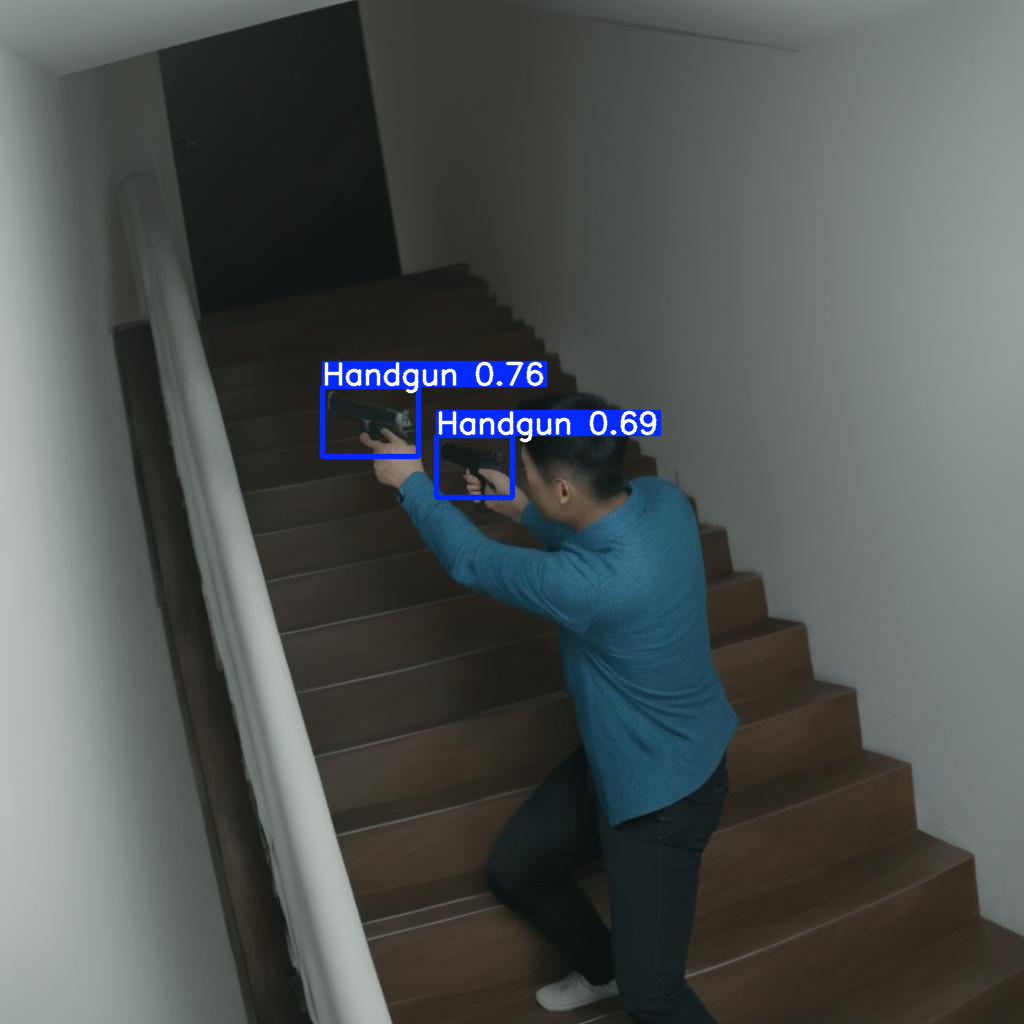

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 943.1±1982.4 MB/s, size: 1291.5 KB)


val: Scanning /content/dataset/labels/val.cache... 2649 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2649/2649 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.0GB RAM): 100%|██████████| 2649/2649 [00:11<00:00, 225.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:16<00:00,  2.52it/s]


                   all       2649       2797       0.96      0.828      0.904      0.693
               Handgun        929        959      0.958      0.803      0.889      0.656
                 Rifle        737        805      0.954        0.8      0.891      0.689
               Shotgun       1000       1033      0.967      0.882      0.933      0.735
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default2


array([    0.65586,     0.68945,     0.73499])

In [ ]:
from ultralytics import YOLO

# Load Base Model
# Load a pretrained YOLOv8 model
# model = YOLO("path/to/your_last_model.pt")  # Use this to resume training
model = YOLO("yolov8n.pt")  # Use a fresh yolov8n model or yolo11n, yolo12n

project = "/content/drive/MyDrive/GunDetection_project/YOLOv8"  # Output directory for trained models
name = "00-Train_model_gun_detection_yolov8_default"  # Name for the output run folder
# 💾 Model will be saved to: /content/drive/MyDrive/GunDetection_project/YOLOv8/00-Train_model_gun_detection_yolov8_default

# Config parameter and Train the model
model.train(
    data="/content/dataset/gun_dataset.yaml",
    epochs=100,
    device=0,
    project=project,
    name=name,
    cache=True
)
# model.train(resume=True)  # Uncomment this to resume training

# Test Prediction on a Single Image
results = model("dataset/images/val/ai_gen_handgun_309-flip.jpg")
results[0].show()

# 📊 Validate the Model Performance
metrics = model.val(
    iou=0.5,
    conf=0.50,
    data="/content/dataset/gun_dataset.yaml",
    device="0",
    batch=64
    )
metrics.box.map     # mean Average Precision (mAP) @ IoU=0.5:0.95
metrics.box.map50   # mAP @ IoU=0.5
metrics.box.map75   # mAP @ IoU=0.75
metrics.box.maps    # List of mAPs per class